In [3]:
import os
import networkx as nx 
import matplotlib.pyplot as plt
import pandas as pd
import community
import matplotlib.pyplot as plt

os.getcwd()

'D:\\home\\adriana\\GitHub\\social_interaction\\clustering'

# Setting Up The Edgelist

We read in the complete data of who follows whom and store this in the edgelist.

In [4]:
friendship = nx.read_edgelist('followers_complete.csv',
                                    delimiter = ',', 
                                    create_using = nx.Graph, 
                                    nodetype = str,
                                    data = ("person","retweet_count")
                             )

In [5]:
# We also need to know who is in this list
 
beteiligte = pd.read_csv('followers_complete.csv', header = None)
beteiligte

0               1
0     realDonaldTrump        LouDobbs
1     realDonaldTrump       GOPLeader
2     realDonaldTrump    senatemajldr
3     realDonaldTrump      Jim_Jordan
4     realDonaldTrump  MariaBartiromo
...               ...             ...
4597    ChuckGrassley        LouDobbs
4598    ChuckGrassley        HouseGOP
4599    ChuckGrassley    GOPoversight
4600    ChuckGrassley       SenateGOP
4601    ChuckGrassley             GOP

[4602 rows x 2 columns]

In [6]:
beteiligtenliste = []

for name in beteiligte[0]:
    if name not in beteiligtenliste:
        beteiligtenliste.append(name)
        
print(len(beteiligtenliste))

97


We thus have 97 praticipants in our dataframe of who follows whom. We need to crosscheck this for our nubers of retweets.

In [7]:
retweeters = pd.read_csv("../get_retweets/number_of_retweets.csv")
retweeters["0"] = retweeters["0"].str.replace("\@", "")

retweeters

0    1
0   realDonaldTrump  918
1        WhiteHouse  655
2         TeamTrump  273
3     GOPChairwoman  211
4        DanScavino  145
..              ...  ...
95    SenRonJohnson   15
96    SenThomTillis   15
97    EliseStefanik   15
98         brithume   15
99    ChuckGrassley   15

[100 rows x 2 columns]

We see here that the frames are not of same length. The following accounts are not included:

In [8]:
to_be_deleted = []

for name in retweeters["0"]:
    if name not in beteiligtenliste:
        to_be_deleted.append(name)
        
to_be_deleted

['paulsperry_', 'mike_pence', 'DRUDGE_REPORT']

We are going to delete these accounts from the retweeters-Dataframe (as they are not in the Beteiligtenliste which bases on the entire "who follows whom".

In [9]:
retweeters.rename(columns = {"0": "user"}, inplace = True)


for element in to_be_deleted:
    retweeters = retweeters[retweeters.user != element]
    
print("This dataframe has now a length of " + str(len(retweeters)))

This dataframe has now a length of 97


# Drawing the network

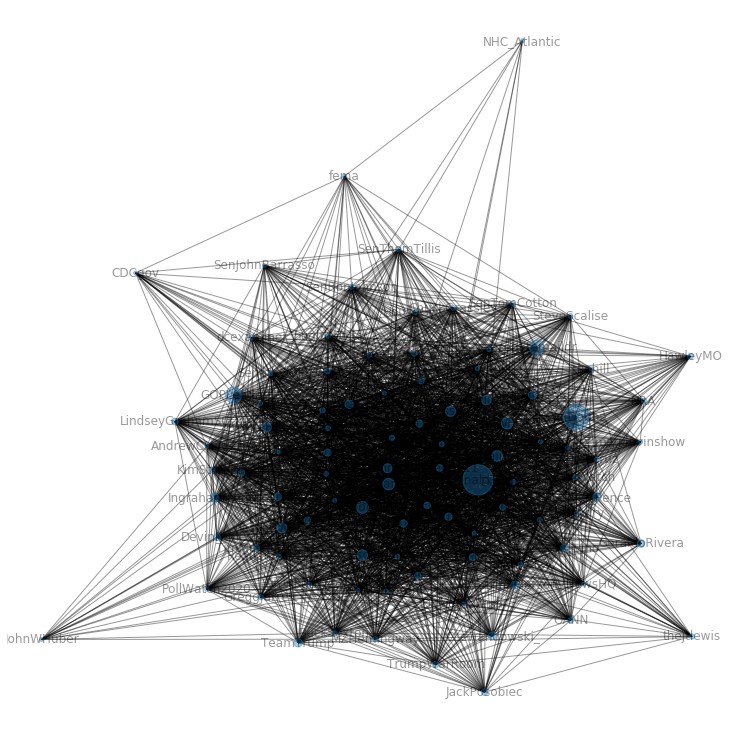

In [10]:
plt.figure(figsize=(10,10))
nx.draw(friendship, with_labels = True, node_size = retweeters["1"], edge_color="black", alpha=0.4)

# Clustering

## Partitioning
First off, we let the algorithm decide how to split our network

In [11]:
coords = nx.spring_layout(friendship)
automated_partition = community.best_partition(friendship)

print(automated_partition)

{'realDonaldTrump': 0, 'LouDobbs': 1, 'GOPLeader': 1, 'senatemajldr': 1, 'Jim_Jordan': 2, 'MariaBartiromo': 2, 'VP': 0, 'GOPChairwoman': 0, 'parscale': 0, 'PressSec': 1, 'JesseBWatters': 2, 'WhiteHouse': 1, 'Scavino45': 1, 'KellyannePolls': 2, 'IngrahamAngle': 2, 'Mike_Pence': 0, 'TeamTrump': 0, 'seanhannity': 1, 'CLewandowski_': 0, 'KatrinaPierson': 0, 'foxandfriends': 1, 'GeraldoRivera': 1, 'ericbolling': 0, 'DanScavino': 0, 'EricTrump': 0, 'DonaldJTrumpJr': 0, 'IvankaTrump': 1, 'FLOTUS': 0, 'RudyGiuliani': 0, 'DevinNunes': 2, 'charliekirk11': 0, 'LindseyGrahamSC': 1, 'JackPosobiec': 0, 'JennaEllisEsq': 0, 'EliseStefanik': 1, 'RNCResearch': 2, 'TrumpWarRoom': 0, 'marcorubio': 1, 'TimMurtaugh': 2, 'kayleighmcenany': 0, 'GOP': 0, 'OANN': 0, 'HawleyMO': 0, 'RepLeeZeldin': 1, 'RepDougCollins': 1, 'NRA': 0, 'RepMattGaetz': 1, 'KimStrassel': 2, 'thejtlewis': 0, 'GreggJarrett': 2, 'TomFitton': 1, 'MZHemingway': 2, 'dbongino': 2, 'SaraCarterDC': 1, 'dcexaminer': 1, 'DailyCaller': 0, 'ChuckGr

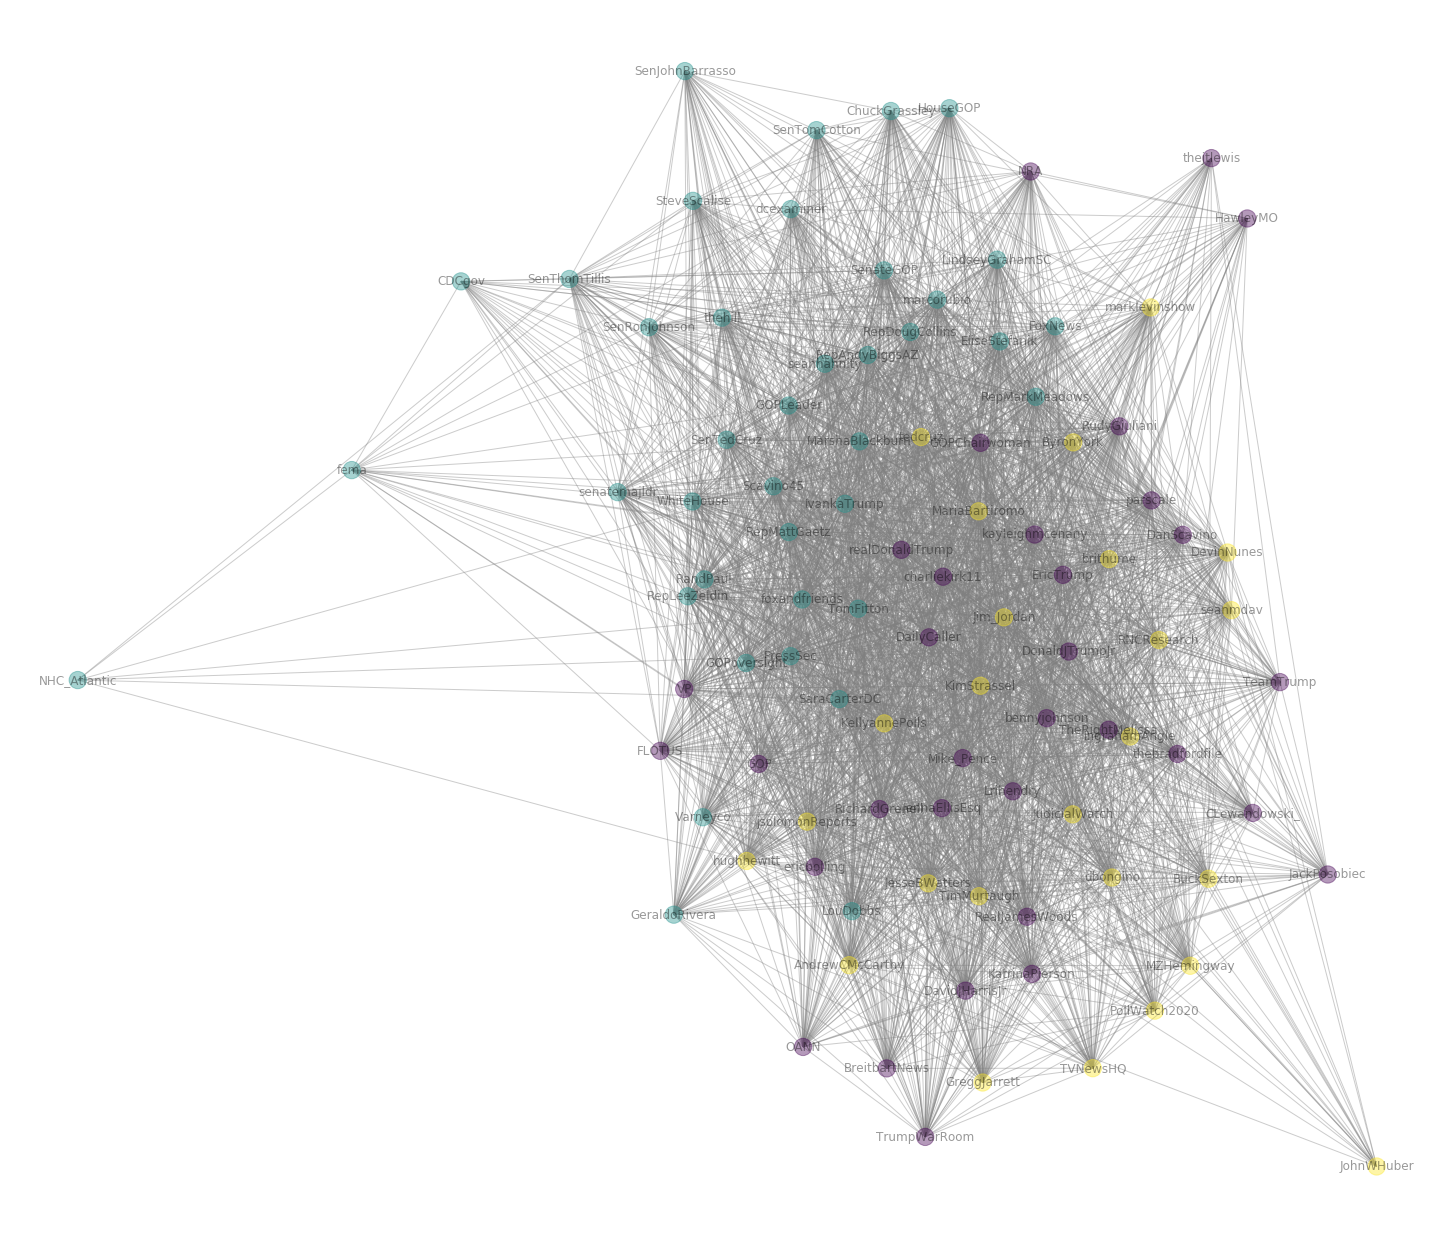

In [12]:
plt.figure(figsize=(20,17))
nx.draw(friendship,
              pos = coords,
              node_color = list(dict.values(automated_partition)), with_labels = True, alpha = 0.4, 
        edge_color="grey")

plt.savefig('automated_clusterig.png')

# Comparison

In order to compare this, we also set up a manual categorization.

In [13]:
manuelle_klas = pd.read_csv("klassifizierung _numbered.csv", header = None)
manuelle_klas[2] = manuelle_klas[2].str.replace("politician", "1")
manuelle_klas[2] = manuelle_klas[2].str.replace("political_org", "2")
manuelle_klas[2] = manuelle_klas[2].str.replace("administration", "3")
manuelle_klas[2] = manuelle_klas[2].str.replace("neus", "4")
manuelle_klas[2] = manuelle_klas[2].str.replace("news", "4")
manuelle_klas[2] = manuelle_klas[2].str.replace("private", "5")
manuelle_klas[2] = manuelle_klas[2].str.replace("family", "6")
manuelle_klas

0                1  2
0     1  realDonaldTrump  1
1     2       WhiteHouse  2
2     3        TeamTrump  2
3     4    GOPChairwoman  1
4     5       DanScavino  5
..  ...              ... ..
95   96    SenRonJohnson  1
96   97    SenThomTillis  1
97   98    EliseStefanik  1
98   99         brithume  4
99  100    ChuckGrassley  1

[100 rows x 3 columns]

In [14]:
for name in manuelle_klas[1]:
    if name not in beteiligtenliste:
        print(name)
        
manuelle_klas.rename(columns = {1: "user"}, inplace = True)
        
for element in to_be_deleted:
    manuelle_klas = manuelle_klas[manuelle_klas.user != element]

paulsperry_
mike_pence
DRUDGE_REPORT


In [15]:
manuelle_klas

0             user  2
0     1  realDonaldTrump  1
1     2       WhiteHouse  2
2     3        TeamTrump  2
3     4    GOPChairwoman  1
4     5       DanScavino  5
..  ...              ... ..
95   96    SenRonJohnson  1
96   97    SenThomTillis  1
97   98    EliseStefanik  1
98   99         brithume  4
99  100    ChuckGrassley  1

[97 rows x 3 columns]

In [16]:
manuelle_klas[2] = pd.to_numeric(manuelle_klas[2])
manuelle_klas

0             user    2
0     1  realDonaldTrump  1.0
1     2       WhiteHouse  2.0
2     3        TeamTrump  2.0
3     4    GOPChairwoman  1.0
4     5       DanScavino  5.0
..  ...              ...  ...
95   96    SenRonJohnson  1.0
96   97    SenThomTillis  1.0
97   98    EliseStefanik  1.0
98   99         brithume  4.0
99  100    ChuckGrassley  1.0

[97 rows x 3 columns]

We now have to turn this into a list into a dictionary to enable the plotting.

In [17]:
# list
user = manuelle_klas["user"].tolist()
rating = manuelle_klas[2].tolist()

#dict
our_class = dict(zip(user, rating))
our_class


{'realDonaldTrump': 1.0,
 'WhiteHouse': 2.0,
 'TeamTrump': 2.0,
 'GOPChairwoman': 1.0,
 'DanScavino': 5.0,
 'Jim_Jordan': 1.0,
 'GOP': 2.0,
 'Scavino45': 3.0,
 'DonaldJTrumpJr': 6.0,
 'IvankaTrump': 6.0,
 'GreggJarrett': 4.0,
 'EricTrump': 6.0,
 'TomFitton': 5.0,
 'RepMarkMeadows': 1.0,
 'marklevinshow': 5.0,
 'TrumpWarRoom': 2.0,
 'LindseyGrahamSC': 1.0,
 'charliekirk11': 5.0,
 'dbongino': 5.0,
 'SenateGOP': 1.0,
 'GOPLeader': 1.0,
 'JudicialWatch': 2.0,
 'senatemajldr': 1.0,
 'foxandfriends': 4.0,
 'seanhannity': 4.0,
 'VP': 3.0,
 'SteveScalise': 1.0,
 'MZHemingway': 4.0,
 'FLOTUS': 3.0,
 'LouDobbs': 4.0,
 'DailyCaller': 4.0,
 'BuckSexton': 5.0,
 'RepAndyBiggsAZ': 1.0,
 'RepLeeZeldin': 1.0,
 'KimStrassel': 4.0,
 'Mike_Pence': 5.0,
 'MariaBartiromo': 4.0,
 'PressSec': 3.0,
 'SaraCarterDC': 4.0,
 'RepDougCollins': 1.0,
 'RepMattGaetz': 1.0,
 'NHC_Atlantic': 2.0,
 'JohnWHuber': 3.0,
 'MarshaBlackburn': 1.0,
 'AndrewCMcCarthy': 4.0,
 'RandPaul': 1.0,
 'IngrahamAngle': 4.0,
 'TVNewsHQ': 5

We now plot this again.

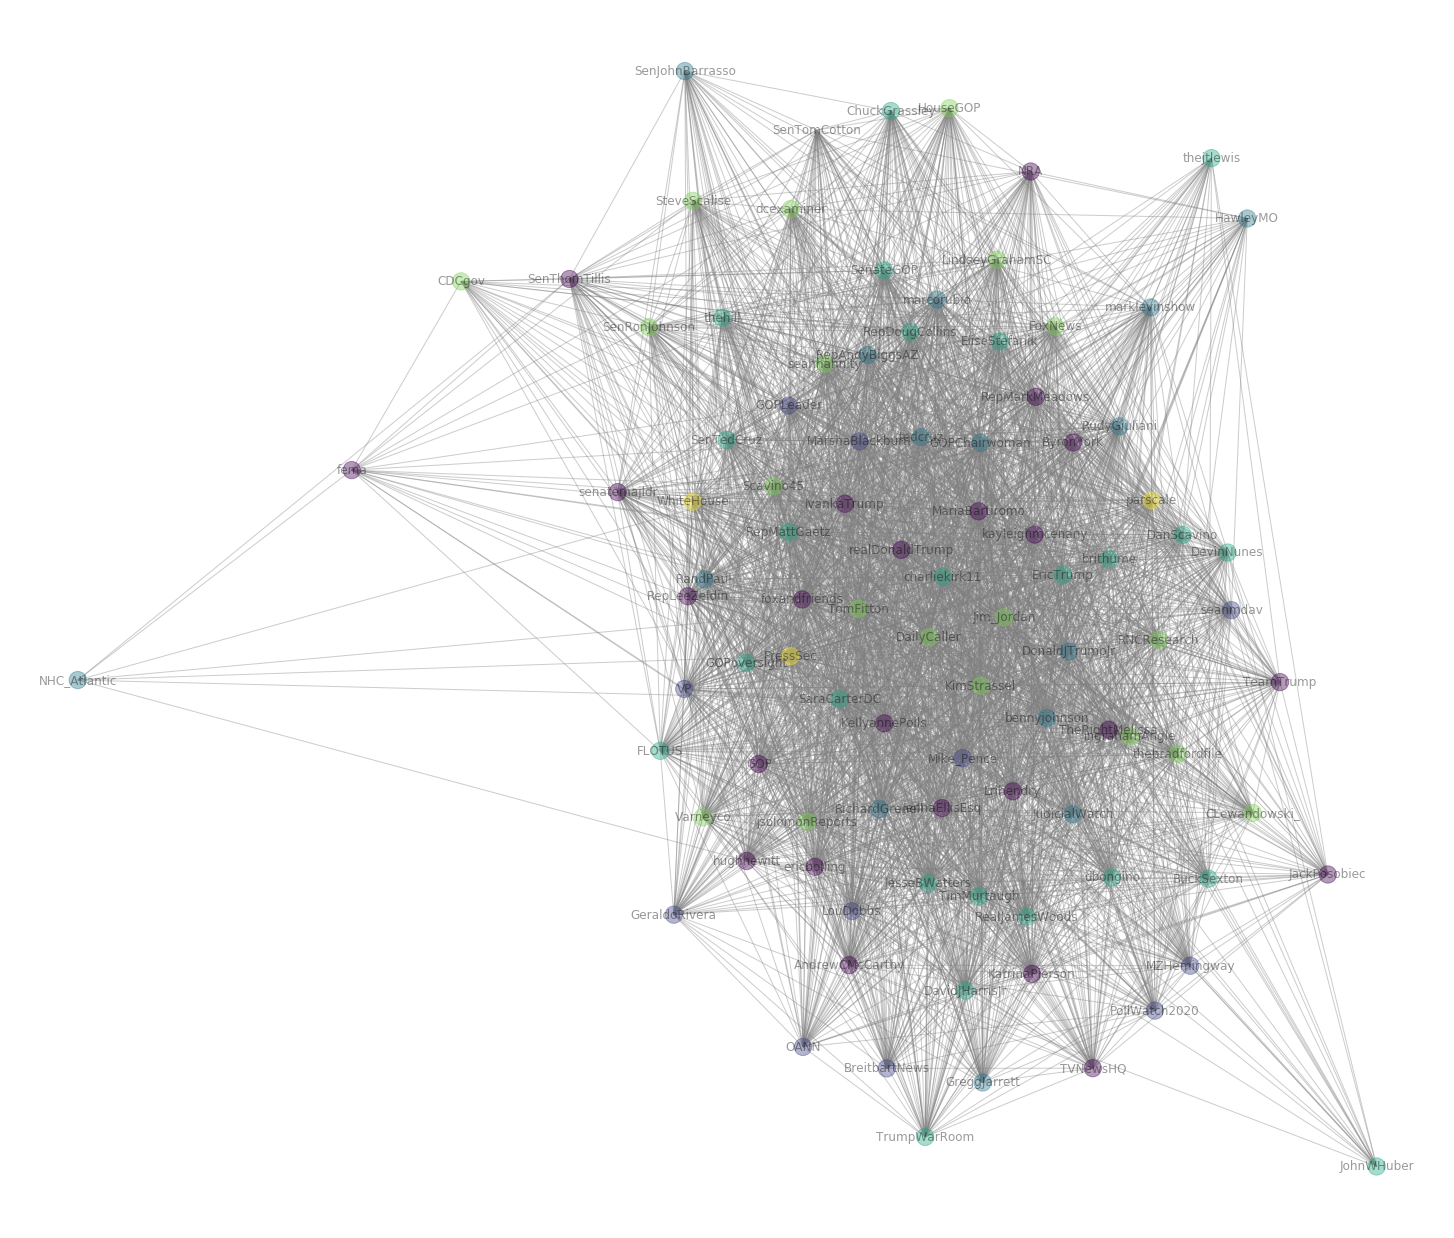

In [22]:
plt.figure(figsize=(20,17))
nx.draw(friendship,
              pos = coords,
              node_color = list(dict.values(our_class)), with_labels = True, alpha = 0.4, 
        edge_color="grey")

plt.savefig('manual_clustering_6.png')

It seems like we have made too much of an effort. There are for example only three yellow nodes. We thus go for three groups in the manual classification as well

In [19]:
manuelle_klas.rename(columns = {2: "kategorie"}, inplace = True)

print("Klassifiziert mit 1 (Politiker) sind " + str(len(manuelle_klas[manuelle_klas.kategorie == 1])))
print("Klassifiziert mit 2 (pol. Organisationen) sind " + str(len(manuelle_klas[manuelle_klas.kategorie == 2])))
print("Klassifiziert mit 3 (Administration) sind " + str(len(manuelle_klas[manuelle_klas.kategorie == 3])))
print("Klassifiziert mit 4 (News) sind " + str(len(manuelle_klas[manuelle_klas.kategorie == 4])))
print("Klassifiziert mit 5 (Privat) sind " + str(len(manuelle_klas[manuelle_klas.kategorie == 5])))
print("Klassifiziert mit 6 (Family) sind " + str(len(manuelle_klas[manuelle_klas.kategorie == 6])))

Klassifiziert mit 1 (Politiker) sind 24
Klassifiziert mit 2 (pol. Organisationen) sind 11
Klassifiziert mit 3 (Administration) sind 15
Klassifiziert mit 4 (News) sind 24
Klassifiziert mit 5 (Privat) sind 19
Klassifiziert mit 6 (Family) sind 3


In [20]:
manuelle_klas["kategorie"] = manuelle_klas["kategorie"].replace([5], 6)    #combining family with private
manuelle_klas["kategorie"] = manuelle_klas["kategorie"].replace([1], 3)    #combining politicians and administ.
manuelle_klas

0             user  kategorie
0     1  realDonaldTrump        3.0
1     2       WhiteHouse        2.0
2     3        TeamTrump        2.0
3     4    GOPChairwoman        3.0
4     5       DanScavino        6.0
..  ...              ...        ...
95   96    SenRonJohnson        3.0
96   97    SenThomTillis        3.0
97   98    EliseStefanik        3.0
98   99         brithume        4.0
99  100    ChuckGrassley        3.0

[97 rows x 3 columns]

Now we launch all things again to draw our network again. 

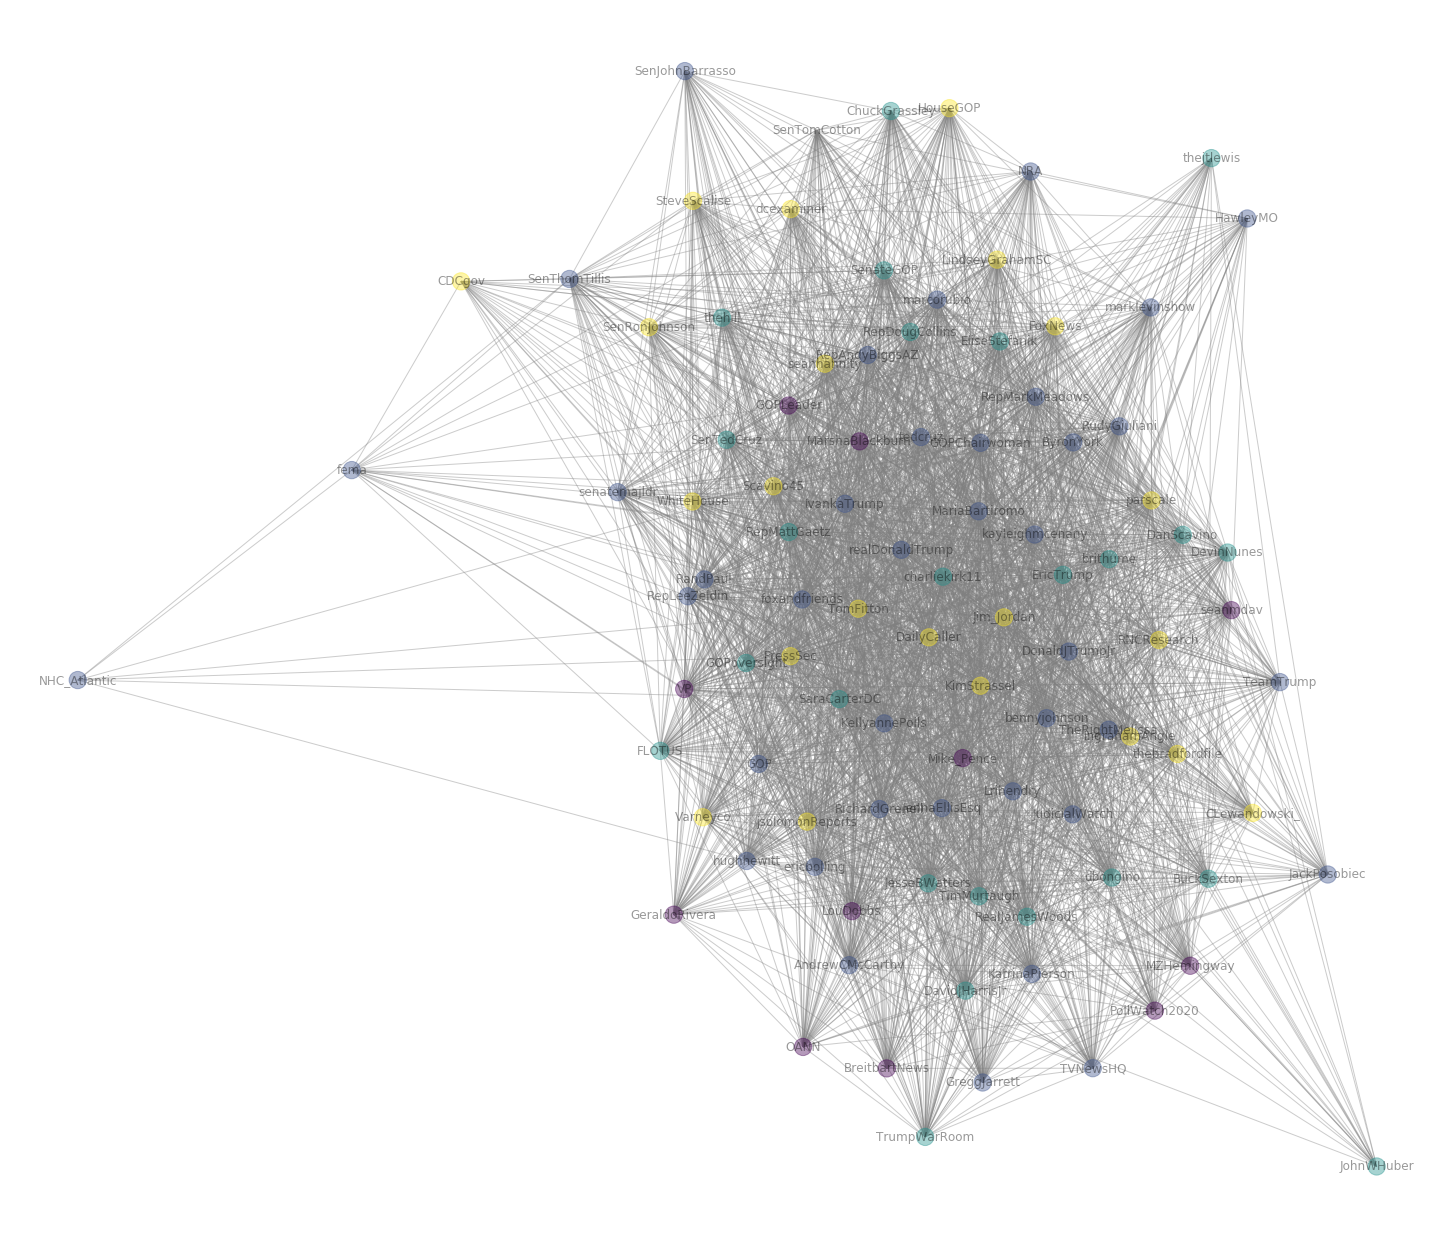

In [23]:
# list
user2 = manuelle_klas["user"].tolist()
rating2 = manuelle_klas["kategorie"].tolist()

#dict
our_class2 = dict(zip(user2, rating2))

plt.figure(figsize=(20,17))
nx.draw(friendship,
              pos = coords,
              node_color = list(dict.values(our_class2)), with_labels = True, alpha = 0.4, 
        edge_color="grey")

plt.savefig('manual_clustering_4.png')

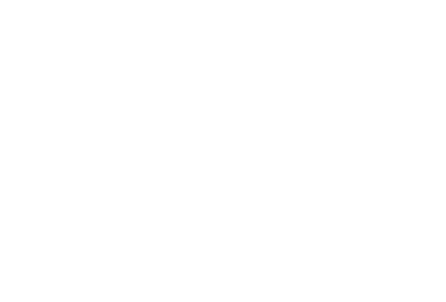